<center> <h2> DS 3000 - Fall 2021</h2> </center>
<center> <h3> DS Report </h3> </center>

<center> <h3> Zillow Housing Price Predictor</h3> </center>
<center><h4>Jasmine Liu, Sruthi Chintalacharuvu, Ben Wyant</h4></center>

In [ ]:
# Colab link: https://colab.research.google.com/drive/1l3S6hAnf5_FbQYrV8411KrUFIOF55cCV?usp=sharing

<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

COVID-19 has affected the real estate market in the United States. With 44% of homes sales occurring in the south, we wanted to observe what was affecting the prices of the houses sold in this region. To acquire the necessary data, we scraped Zillow for recently sold houses in five southern states. Next, we utilized four machine learning algorithms to try to obtain the most accurate prediction model. In the process, we performed feature selection and hyperparameter tuning to determine that Linear Regression had the best performance on our dataset. However, results showed that we did not have a sufficient enough dataset to predict which features had the most influence on the selling price of houses, nor did our models very accurately predict the prices as well.


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

<h4>Problem Statement</h4>

Our group would like to gather more insight on housing prices in the southern states of the U.S. where the country is seeing an increasing amount of home sales. With the recovering economy from COVID-19, more buyers are entering the housing market and the housing prices are slowly increasing. Recent studies show that the Southern states accounted for almost 44% of home sales in the past few years. Therefore, our group’s goal is to analyze the characteristics of houses in the South and determine whether there is a correlation between these features to predict the housing prices. Zillow is one of the largest real estate websites in the United States and many people turn to Zillow when buying and selling real estate. We want to determine whether prices of the houses listed for sale are determined by the data made public on the site or if there is hidden data and other non-quantifiable characteristics such as modernity of a home that is being used in the listing prices. If our model can accurately predict housing prices for sold homes without overfitting the data, we should be able to predict whether houses listed currently are being priced too low, high, or pretty close to the expected selling price.



<h4>Significance of the Problem</h4>

It’s important to tackle this problem because data science is beginning to play a huge role in how real estate is valued and purchased. Zillow has begun buying homes using their algorithm and now many large investors are looking towards data scientists to guide them in investing in real estate. Using geographic information and other home features, we want to see how accurately we can predict housing prices and whether or not these home features have a noticeable impact on housing prices. This could be useful in allowing fair assessments of homes to be made so neither buyers or sellers are pressured into bad deals. 


<h4>Questions</h4>

Some questions that we have regarding our problem and its significance include:
- What features have more influence on the house price?
- How do sites like Zillow determine which features are most important for their house price predictors?
- Is there a ML algorithm that will perform significantly better than the rest between k-nearest neighbors (kNN), Linear Regression, Lasso Regression, and Ridge Regression? If so, why did that one perform better?
- What methods of preprocessing and hyperparameter tuning will provide the best result on our test data?



<h4>References<h4>

Dowell, E. K. P. (2021, October 9). Remote working, commuting time, life events all affect home buyers' decisions. Census.gov. Retrieved December 5, 2021, from https://www.census.gov/library/stories/2021/10/zillow-and-census-bureau-data-show-pandemics-impact-on-housing-market.html. 

Friedman, N. (2021, November 22). U.S. home sales on track for biggest year in 15 years. The Wall Street Journal. Retrieved December 5, 2021, from https://www.wsj.com/articles/u-s-home-sales-on-track-for-biggest-year-in-15-years-11637593790. 


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### Data Acquisition

We scraped our data from Zillow from multiple cities in five Southern states - Florida, Georgia, Alabama, South Carolina, and Tennessee. While picking cities to retrieve data from, we determined the top 20-25 most populated cities in the five states above. We searched the site for houses that were recently sold, and we scraped for features that could be helpful for determining the final price of the house. 


Links to original data sources:

- Florida: https://www.zillow.com/homes/florida_rb/
- Georgia: https://www.zillow.com/homes/georgia_rb/
- Alabama: https://www.zillow.com/homes/alabama_rb/
- South Carolina: https://www.zillow.com/homes/south-carolina_rb/
- Tennessee: https://www.zillow.com/homes/tennessee_rb/

The dataset we are using for our project is about real estate information scraped from Zillow for houses in the southern states in the U.S. The dataset includes 1062 rows/samples. Our features include year sold, ZIP, beds, bath, sqft, month sold, broker, city, and state. Our target variable is the predicted price. 

Our features:

	- city_sold: the city the house was sold in
	- state_sold: the state the house was sold in
	- zip_code: the house’s zip code
	- bds: the number of bedrooms
	- ba: the number of bathrooms
	- sqft: the square footage of the house
	- broker_name: brokerage selling the house
	- month_sold: the month sold
	- year_sold: the year sold
Our target:

	- price_sold: the price the house was sold for

Our data scraping code can be found here: https://github.com/jasmineliu0114/Zillow-Housing-Price-Predictor/blob/main/FP2_Dataset.ipynb

Our resulting dataset: 
https://github.com/jasmineliu0114/Zillow-Housing-Price-Predictor/blob/main/real_estate_prices_in_the_south.csv


### Data Analysis

Our predictive model is a regression model that will use the features of the houses we scraped from Zillow to predict the house prices. We think these are important predictors because the features listed on an online housing website are the features that are important to home buyers when evaluating potential future homes. This is a supervised ML problem because it is a regression problem which is a subfield of supervised learning. Regression requires a labeled dataset and uses independent variables (features) to predict the dependent variable (price), therefore, this is a supervised ML problem. 

Our features/independent variables: 

    - city_sold, state_sold, zip_code, bds, ba, sqft, broker_name, month_sold, year_sold

Our target/outcome variable: 

	- price_sold

We are planning to use k-nearest neighbors (kNN), Linear Regression, Lasso Regression, and Ridge Regression. To apply kNN we assume that the value can be approximated by some local values of features - an approximation can be made by the distance between some of the feature values and not the model’s entire distribution. To apply Linear Regression we assume that all the values can be modeled numerically and that there is some line of best fit using a variety of features that can best approximate a house price. The same assumptions to perform Linear Regression can be made for Lasso and Ridge Regression. The data needs to be able to be regularized and lasso and ridge will help reduce bias and variance. We plan to try all of these algorithms because we are uncertain if one specific algorithm would give us better results over the others. However, we do think that Linear Regression will give us the worst result because it does not account for bias or weighting features.

Additionally, we plan to use RFE to select the most important features. For our RFE, we plan to use a Decision Tree regressor to recursively eliminate features. This will help us determine if the use of just the important features will affect R-squared values for the training and test sets. We will also use one hot encoding to turn categorical data into numerical data for features such as state, city, and month sold. We plan to plot all of our features against the target house prices as scatterplots to visualize the relationship between each feature with our target value. In addition, we plan on plotting the expected vs predicted house prices. This graph would be a scatterplot with a "perfect prediction" line in order to visualize the accuracy of our estimates.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### Data Wrangling

### Our dataset:

In [6]:
import pandas as pd

zillow_df = pd.read_csv("real_estate_prices_in_the_south.csv")
zillow_df

,price_sold,city_sold,state_sold,zip_code,bds,ba,sqft,broker_name,month_sold,year_sold
0,"$232,600",Jacksonville,fl,32234,3,2,"1,406",NaN,10,2107
1,"$495,000",Jacksonville,fl,32081,3,2,"1,832",NaN,11,2021
2,"$473,500",Jacksonville,fl,32256,4,4,"2,360",NaN,11,2021
3,"$343,000",Jacksonville,fl,32257,3,2,"1,728",NaN,11,2021
4,"$300,000",Jacksonville,fl,32221,4,2,"1,952",NaN,11,2021
...,...,...,...,...,...,...,...,...,...,...
1057,"$255,000",Dickson,tn,37055,3,2,"1,225",NaN,10,2021
1058,"$220,000",Dickson,tn,37055,3,1,"1,107",NaN,10,2021
1059,"$280,000",Dickson,tn,37029,3,2,"1,366",NaN,10,2021
1060,"$290,000",Dickson,tn,37055,3,2,"1,283",NaN,10,2021


We noticed that in our dataset, there were some rows with empty sqft, bds, and/or ba columns. First, we counted how many rows had empty values to decide if removing those rows would greatly affect the size of our data. After determining that the number would not be too large, we removed the empty rows from our dataset.

In [7]:
# check how many listings have "-- " sqft
emptySqft = (zillow_df['sqft'] == '-- ').sum(axis=0)
print(emptySqft) # 32 listings have no value for sqft 

emptyBds = (zillow_df['bds'] == '-- ').sum(axis=0)
print(emptyBds) # 30 listings have no value for number of bedrooms

emptyBa = numDash = (zillow_df['ba'] == '-- ').sum(axis=0)
print(emptyBa) # 9 listings have no value for number of bathrooms

32
30
9


In [8]:
# removes rows where value is "-- "
zillow_df = zillow_df[zillow_df["sqft"] != '-- ']
zillow_df = zillow_df[zillow_df["bds"] != '-- ']
zillow_df = zillow_df[zillow_df["ba"] != '-- ']
zillow_df

,price_sold,city_sold,state_sold,zip_code,bds,ba,sqft,broker_name,month_sold,year_sold
0,"$232,600",Jacksonville,fl,32234,3,2,"1,406",NaN,10,2107
1,"$495,000",Jacksonville,fl,32081,3,2,"1,832",NaN,11,2021
2,"$473,500",Jacksonville,fl,32256,4,4,"2,360",NaN,11,2021
3,"$343,000",Jacksonville,fl,32257,3,2,"1,728",NaN,11,2021
4,"$300,000",Jacksonville,fl,32221,4,2,"1,952",NaN,11,2021
...,...,...,...,...,...,...,...,...,...,...
1057,"$255,000",Dickson,tn,37055,3,2,"1,225",NaN,10,2021
1058,"$220,000",Dickson,tn,37055,3,1,"1,107",NaN,10,2021
1059,"$280,000",Dickson,tn,37029,3,2,"1,366",NaN,10,2021
1060,"$290,000",Dickson,tn,37055,3,2,"1,283",NaN,10,2021


All our data is currently formatted as strings, as scraped from Zillow. However, having our numerical data represented as strings is useless so we are going through and converting all the numerical data currently represented as strings into numbers which we can normalize and perform data analysis.

In [9]:
def convert_million(price):
    """Converts prices over a million to the full number written out. Also converts all prices to integers. 
    Parameters:
        price (string): the string price to convert
    Returns:
        (int): the converted price to integer
    """
    if 'M' in price:
        without_m = price[0:len(price) - 1]
        split = without_m.strip().split('.')
        combined = int(split[0] + split[1])
        return combined * 10000
    elif ',' in price:
        without_comma = price.strip().split(',')
        comb = without_comma[0] + without_comma[1]
        return int(comb)
    else:
        return int(price)

In [10]:
# removes the commas from the square footage
zillow_df['sqft'] = zillow_df['sqft'].str.replace(',','')

# removes the dollar sign from the price_sold column
zillow_df['price_sold'] = zillow_df['price_sold'].str.replace('$', '')

# fixes million dollar value houses and converts price_sold column to numerical values
zillow_df['price_sold'] = zillow_df['price_sold'].map(convert_million)

# converting columns into int/float values
zillow_df['sqft'] = zillow_df['sqft'].astype('int')
zillow_df['zip_code'] = zillow_df['zip_code'].astype('int')
zillow_df['bds'] = zillow_df['bds'].astype('int')
zillow_df['ba'] = zillow_df['ba'].astype('float')
zillow_df['month_sold'] = zillow_df['month_sold'].astype('int')
zillow_df['year_sold'] = zillow_df['year_sold'].astype('int')
zillow_df

<ipython-input-10-ef45c492f63b>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  zillow_df['price_sold'] = zillow_df['price_sold'].str.replace('$', '')


,price_sold,city_sold,state_sold,zip_code,bds,ba,sqft,broker_name,month_sold,year_sold
0,232600,Jacksonville,fl,32234,3,2.0,1406,NaN,10,2107
1,495000,Jacksonville,fl,32081,3,2.0,1832,NaN,11,2021
2,473500,Jacksonville,fl,32256,4,4.0,2360,NaN,11,2021
3,343000,Jacksonville,fl,32257,3,2.0,1728,NaN,11,2021
4,300000,Jacksonville,fl,32221,4,2.0,1952,NaN,11,2021
...,...,...,...,...,...,...,...,...,...,...
1057,255000,Dickson,tn,37055,3,2.0,1225,NaN,10,2021
1058,220000,Dickson,tn,37055,3,1.0,1107,NaN,10,2021
1059,280000,Dickson,tn,37029,3,2.0,1366,NaN,10,2021
1060,290000,Dickson,tn,37055,3,2.0,1283,NaN,10,2021


After examining the categorical values of our dataset, we determined that the broker_name column is unlikely to be useful for us. We came to this conclusion because more than 300 rows do not contain broker_name values. Removing those rows would take away too many data points. Additionally, because we have a large range of different brokers, the NaN values would be classified as one broker if we were to keep its value, which would be a much larger group than any of the other individual brokers and not having an even sample of brokers could negatively effect our algorithm's performance after training.

In [11]:
import math

# check how many listings have NaN broker_name
count = 0
for x in range(1002):
    if type(zillow_df['broker_name'].iloc[x]) == float:
        if math.isnan(zillow_df['broker_name'].iloc[x]):
            count +=1

count # 362 rows have NaN broker_name

362

In [12]:
# drop the column containing broker names since 30% of values are N/A

zillow_df.drop('broker_name', axis=1, inplace=True)
zillow_df

,price_sold,city_sold,state_sold,zip_code,bds,ba,sqft,month_sold,year_sold
0,232600,Jacksonville,fl,32234,3,2.0,1406,10,2107
1,495000,Jacksonville,fl,32081,3,2.0,1832,11,2021
2,473500,Jacksonville,fl,32256,4,4.0,2360,11,2021
3,343000,Jacksonville,fl,32257,3,2.0,1728,11,2021
4,300000,Jacksonville,fl,32221,4,2.0,1952,11,2021
...,...,...,...,...,...,...,...,...,...
1057,255000,Dickson,tn,37055,3,2.0,1225,10,2021
1058,220000,Dickson,tn,37055,3,1.0,1107,10,2021
1059,280000,Dickson,tn,37029,3,2.0,1366,10,2021
1060,290000,Dickson,tn,37055,3,2.0,1283,10,2021


We also noticed that there were some outliers in the year_sold column. These were probably typos on Zillow's end, but as integer values, these outliers will have a negative effect on the accuracy of our machine learning algorithms.

In [13]:
# removes outliers from year_sold column
zillow_df = zillow_df[zillow_df["year_sold"] <= 2021]
zillow_df

,price_sold,city_sold,state_sold,zip_code,bds,ba,sqft,month_sold,year_sold
1,495000,Jacksonville,fl,32081,3,2.0,1832,11,2021
2,473500,Jacksonville,fl,32256,4,4.0,2360,11,2021
3,343000,Jacksonville,fl,32257,3,2.0,1728,11,2021
4,300000,Jacksonville,fl,32221,4,2.0,1952,11,2021
5,300000,Jacksonville,fl,32206,4,3.0,2003,11,2021
...,...,...,...,...,...,...,...,...,...
1057,255000,Dickson,tn,37055,3,2.0,1225,10,2021
1058,220000,Dickson,tn,37055,3,1.0,1107,10,2021
1059,280000,Dickson,tn,37029,3,2.0,1366,10,2021
1060,290000,Dickson,tn,37055,3,2.0,1283,10,2021


Next, in order for us to be able to use our categorical values, we used one-hot encoding to represent these categorical features as numerical values. Using one-hot encoding is preferred over simply assigning a number to each categorical value because we do not want the size of the number to affect our machine learning algorithms.

In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)

encoded_df = encoder.fit_transform(zillow_df[["city_sold", "state_sold"]])

# dataframe of one-hot encoded features
encoded_features_df = pd.DataFrame(encoded_df, columns = encoder.get_feature_names(["city_sold", "state_sold"]))

encoded_features_df

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,city_sold_Aiken,city_sold_Alabaster,city_sold_Alafaya,city_sold_Albany,city_sold_Anderson,city_sold_Athens,city_sold_Atlanta,city_sold_Auburn,city_sold_Bartlett,city_sold_Berea,...,city_sold_Tucker,city_sold_Tullahoma,city_sold_Tuscaloosa,city_sold_Valdosta,city_sold_Woodstock,state_sold_al,state_sold_fl,state_sold_ga,state_sold_sc,state_sold_tn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# creates new dataframe of only numerical features by resetting indices 
# and dropping city_sold and state_sold columns from zillow_df
numerical_zillow_df = zillow_df.reset_index().drop(columns=['index','city_sold', 'state_sold'], axis=1, inplace=False)

# merges dataframe with numerical features and dataframe with one-hot encoded features
encoded_zillow_df = pd.merge(numerical_zillow_df, encoded_features_df, left_index=True, right_index=True)
encoded_zillow_df

,price_sold,zip_code,bds,ba,sqft,month_sold,year_sold,city_sold_Aiken,city_sold_Alabaster,city_sold_Alafaya,...,city_sold_Tucker,city_sold_Tullahoma,city_sold_Tuscaloosa,city_sold_Valdosta,city_sold_Woodstock,state_sold_al,state_sold_fl,state_sold_ga,state_sold_sc,state_sold_tn
0,495000,32081,3,2.0,1832,11,2021,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,473500,32256,4,4.0,2360,11,2021,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,343000,32257,3,2.0,1728,11,2021,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,300000,32221,4,2.0,1952,11,2021,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,300000,32206,4,3.0,2003,11,2021,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,255000,37055,3,2.0,1225,10,2021,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
996,220000,37055,3,1.0,1107,10,2021,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,280000,37029,3,2.0,1366,10,2021,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
998,290000,37055,3,2.0,1283,10,2021,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Data Exploration

#### Data Visualization

The variables used in the heatmap below are quantitative features which we could use to check correlation between each other to understand how much relation one feature had with another. This heatmap mostly shows what we expected. There is a positive correlation for beds, baths, sqft, and price for the houses in the data set. This makes sense because what the general trend is that, as a house gets larger, the price increases along with the other features as well.

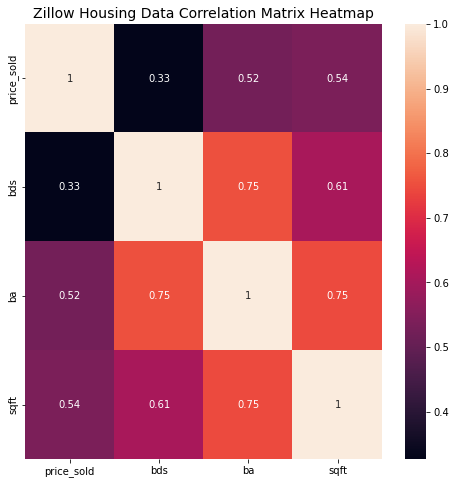

In [16]:
# create a correlation heatmap using seaborn's heatmap feature

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

# drop the categorical columns of the data table
heatmap_df = zillow_df.drop(['year_sold', 'zip_code', 'month_sold'], axis=1)

heatmap = sns.heatmap(heatmap_df.corr(), annot=True)
heatmap.set_title('Zillow Housing Data Correlation Matrix Heatmap', fontdict={'fontsize': 14})

<img src="https://i.ibb.co/T489sny/Screen-Shot-2021-12-10-at-3-00-12-PM.png" width=450/>

The data visualizations below are plotting the mean number of beds, baths, sqft, month sold, and year sold vs. the mean price sold for each city. The graphs represent the relationship between the mean price sold and each of the feature values listed above per city. The graph represents the relationship between the locations of the houses and the numerical values compared to the price sold. The larger the bubble, the more sold homes a city had.

In [17]:
# create a bubble plot showing price vs all other columns for every city

#group the houses by the city they were sold in
grouped_df = zillow_df.groupby('city_sold')
grouped_df.head()

import plotly.express as px

# maintain a list of what state each city is in to color it on the visualization
city_states = {}
for row in zillow_df.itertuples():
    if not row[2] in city_states.keys(): # row[2] is the city_sold and row[3] is the state_sold (the state which the city is in)
        city_states[row[2]] = row[3]

# turn the dictionary into a dataframe and sort it by index so that we can combine it with the main visualization dataframe
city_state_df = pd.DataFrame.from_dict(city_states, orient='index').sort_index().rename(columns={0: 'state'})

# the different features we want to test against price for houses in each city
x_axes = ['bds', 'ba', 'sqft', 'month_sold', 'year_sold']

# group the cities by the mean values to get the avg value for each feature to plot
grouped_counts = grouped_df.count().rename(columns={'state_sold': 'listing_count'})

# add the number of listing counts to the visualization dataframe to be used to create the bubble size
visualization_df = grouped_df.mean().join(grouped_counts['listing_count'])

# add the state the listing is in to the visualization dataframe to be used to create the bubble colors
visualization_df = visualization_df.join(city_state_df)

# map to use for x axis titles for each plot
plt_titles = {'bds': 'Number of Bedrooms', 'ba': 'Number of Bathrooms', 'sqft': 'Square Feet (House Size)',
                'month_sold': 'Month Sold', 'year_sold': 'Year Sold'}

# loop through and create the plots for each feature vs the price
for feature in x_axes:
    fig = px.scatter(visualization_df, x=feature, y='price_sold', size='listing_count', 
                    hover_name=visualization_df.index, color='state', title=('Price Sold vs. ' + plt_titles.get(feature)))
    fig.show()

Unsupported

<img src="https://i.ibb.co/87HgpTM/Bds-vs-Price-sold.png" width=1200 />
<img src="https://i.ibb.co/0XhPbd5/Ba-vs-Price-sold.png" width=1200 />
<img src="https://i.ibb.co/dtymmGf/sqft-vs-price.png" width=1200 />
<img src="https://i.ibb.co/H2kVJfg/month-sold-vs-price.png" width=1200 />
<img src="https://i.ibb.co/ZVWYbyf/year-sold-vs-price.png" width=1200 />

The seven graphs below plot each feature value in our dataset against the target variable: price sold. The graphs help visualize the relationship between each feature and the target value, which gives some insight on which feature values are more influential over the target variable. 

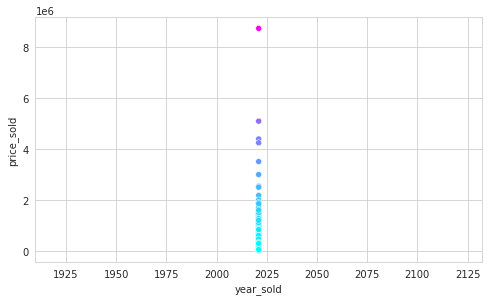

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
features = ['state_sold', 'zip_code', 'bds', 'ba', 'sqft', 'month_sold', 'year_sold']
for feature in features:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=zillow_df, x=feature, y='price_sold', hue='price_sold', 
    palette='cool', legend=False)

<img src="https://i.ibb.co/Nr8LbQ7/Top-2-SS.png" alt="Top-2-SS" border="0">
<img src="https://i.ibb.co/gDBLCvk/3-4-SS.png" alt="3-4-SS" border="0">
<img src="https://i.ibb.co/3mZ5dCj/5-6-SS.png" alt="5-6-SS" border="0">
<img src="https://i.ibb.co/6HxrmTQ/Last-1-SS.png" alt="Last-1-SS" border="0">

The visualization below shows the distribution of the price sold of all the houses in our dataset represented as a histogram. This graph shows us that the prices are right skewed towards extremely expensive houses, some of which are major outliers in the data set.

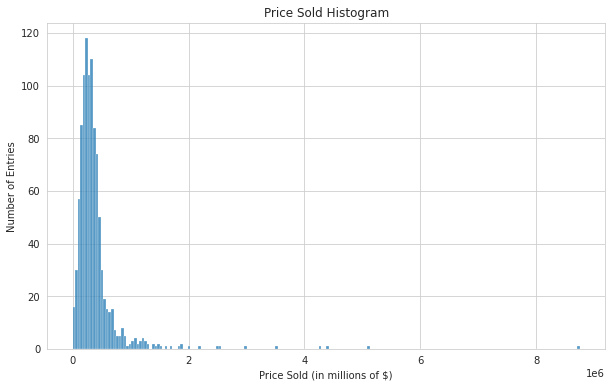

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

histplot = sns.histplot(zillow_df['price_sold'])
histplot.set(title='Price Sold Histogram', xlabel='Price Sold (in millions of $)', ylabel='Number of Entries')
plt.show()

<img src="https://i.ibb.co/cQdyTGb/Screen-Shot-2021-12-10-at-3-39-15-PM.png" />

### Model Training

In [20]:
# Extracts the features and target variables
features = encoded_zillow_df.drop("price_sold", axis=1)
target = encoded_zillow_df["price_sold"]

In [21]:
# Splits the dataset into training and testing sets using random_state of 3000
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
estimators = {
    "Linear Regression" : LinearRegression(), 
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "k-Nearest Neighbor" : KNeighborsRegressor()}

In [23]:
# algorithm performance with all features
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
for estimator_name, estimator_object in estimators.items():
    model = estimator_object
    model.fit(X=X_train, y=y_train)
    print(estimator_name + ':')
    print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train)))
    print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test)))
    print("\tMean squared error for training set: ", mean_squared_error(y_train, model.predict(X_train)))
    print("\tMean squared error for testing set: ", mean_squared_error(y_test, model.predict(X_test)))

Linear Regression:
	R-squared value for training set:  0.5805969737999006
	R-squared value for testing set:  0.30666275619879235
	Mean squared error for training set:  51684528775.1
	Mean squared error for testing set:  341483766691.304
Ridge:
	R-squared value for training set:  0.5772229887984481
	R-squared value for testing set:  0.30841063706755034
	Mean squared error for training set:  52100316964.504074
	Mean squared error for testing set:  340622897109.9747
Lasso:
	R-squared value for training set:  0.5805838467453919
	R-squared value for testing set:  0.3065980590751112
	Mean squared error for training set:  51686146468.7839
	Mean squared error for testing set:  341515631440.654
k-Nearest Neighbor:
	R-squared value for training set:  0.4859133627662481
	R-squared value for testing set:  0.11557517397126582
	Mean squared error for training set:  63352727412.90475
	Mean squared error for testing set:  435598583009.60834


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.939e+13, tolerance: 9.243e+09

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but KNeighbors

Based on the performance of our algorithms, there is indication of underfitting, as our training set has poor performance, and the algorithms poorly generalizes to our testing set as well.

In [24]:
# algorithm performance with selected features
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

select = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 3)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)



print('Selected features after RFE:')
for x in range(len(select.get_support())):
    if select.get_support()[x]:
        print('\t' + features.columns[x])

for estimator_name, estimator_object in estimators.items():
    model = estimator_object.fit(X=X_train_selected, y=y_train)
    print('\n' + estimator_name + ' performance with selected features:')
    print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_selected)))
    print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test_selected)))
    print("\tMean squared error for training set: ", mean_squared_error(y_train, model.predict(X_train_selected)))
    print("\tMean squared error for testing set: ", mean_squared_error(y_test, model.predict(X_test_selected)))

Selected features after RFE:
	zip_code
	ba
	sqft

Linear Regression performance with selected features:
	R-squared value for training set:  0.3834913808937884
	R-squared value for testing set:  0.2605601956134862
	Mean squared error for training set:  75974553052.19876
	Mean squared error for testing set:  364190286762.9393

Ridge performance with selected features:
	R-squared value for training set:  0.3834911548565215
	R-squared value for testing set:  0.260553604811704
	Mean squared error for training set:  75974580907.57626
	Mean squared error for testing set:  364193532877.0608

Lasso performance with selected features:
	R-squared value for training set:  0.3834913808824374
	R-squared value for testing set:  0.26056014867081256
	Mean squared error for training set:  75974553053.59758
	Mean squared error for testing set:  364190309883.2334

k-Nearest Neighbor performance with selected features:
	R-squared value for training set:  0.4859133627662481
	R-squared value for testing set:

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but Ridge was fitted with feature names

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, b

### Model Optimization

Since feature selection performed worse for all of our models, we will continue to just use the training and testing sets with all features. Below, we use GridSearch to hyperparameter tune each of our machine learning algorithms to try to limit the underfitting of our models.

In [25]:
# parameters for each machine learning algorithm
lin_reg_param_grid = {'copy_X': [True, False], 'fit_intercept': [True, False], 'normalize': [True, False]}
ridge_param_grid = {'alpha':[.001, .01, .1, 1, 10, 100]}
lasso_param_grid = {'alpha':[.001, .01, .1, 1, 10, 100]}
knn_param_grid = {"n_neighbors":[1, 5, 10], "metric": ['euclidean', 'manhattan', 'minkowski']}

param_grid = {"Linear Regression" : lin_reg_param_grid, 
    "Ridge" : ridge_param_grid,
    "Lasso" : lasso_param_grid,
    "k-Nearest Neighbor" : knn_param_grid}

In [26]:
# GridSearch using all features
from sklearn.model_selection import GridSearchCV
    
for estimator_name, estimator_object in estimators.items():
    grid_search = GridSearchCV(estimator_object, param_grid[estimator_name], cv=5)
    grid_search.fit(X=X_train, y=y_train)

    print("\nBest parameters for " + estimator_name+ ": ", grid_search.best_params_)
    print("Training set score with best parameters: ", grid_search.score(X_train, y_train))
    print("Test set score with best parameters: ", grid_search.score(X_test, y_test))


Best parameters for Linear Regression:  {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Training set score with best parameters:  0.5805938561640318
Test set score with best parameters:  0.30662886777504217

Best parameters for Ridge:  {'alpha': 10}
Training set score with best parameters:  0.5295133073466725
Test set score with best parameters:  0.3020890883237285

Best parameters for Lasso:  {'alpha': 100}
Training set score with best parameters:  0.5792756064380318
Test set score with best parameters:  0.30572238522234185

Best parameters for k-Nearest Neighbor:  {'metric': 'euclidean', 'n_neighbors': 10}
Training set score with best parameters:  0.4116320032055797
Test set score with best parameters:  0.12916851019272768


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

m

### Model Testing

In [27]:
tuned_estimators = {
    "Linear Regression" : LinearRegression(copy_X=True, fit_intercept=False, normalize=True), 
    "Ridge" : Ridge(alpha=10),
    "Lasso" : Lasso(alpha=100),
    "k-Nearest Neighbor" : KNeighborsRegressor(metric='euclidean', n_neighbors=10)}

In [28]:
for estimator_name, estimator_object in tuned_estimators.items():
    model = estimator_object
    model.fit(X=X_train, y=y_train)
    print(estimator_name + ':')
    print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train)))
    print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test)))
    print("\tMean squared error for training set: ", mean_squared_error(y_train, model.predict(X_train)))
    print("\tMean squared error for testing set: ", mean_squared_error(y_test, model.predict(X_test)))

Linear Regression:
	R-squared value for training set:  0.5805938561640318
	R-squared value for testing set:  0.30662886777504217
	Mean squared error for training set:  51684912972.472694
	Mean squared error for testing set:  341500457481.6703
Ridge:
	R-squared value for training set:  0.5295133073466725
	R-squared value for testing set:  0.3020890883237285
	Mean squared error for training set:  57979750945.19424
	Mean squared error for testing set:  343736398217.35486
Lasso:
	R-squared value for training set:  0.5792756064380318
	R-squared value for testing set:  0.30572238522234185
	Mean squared error for training set:  51847365581.633675
	Mean squared error for testing set:  341946919977.8128
k-Nearest Neighbor:
	R-squared value for training set:  0.4116320032055797
	R-squared value for testing set:  0.12916851019272768
	Mean squared error for training set:  72506683931.65247
	Mean squared error for testing set:  428903567421.87354


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.981e+13, tolerance: 9.243e+09

/opt/python/envs/default/li

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
For our model training, we compared four different machine learning algorithms: Linear Regression, Ridge, Lasso, and k-Nearest Neighbors.  In the end, Linear Regression had the best performance using the following parameters: copy_X=True, fit_intercept=False, and normalize=True. However, even though Linear Regression performed the best, none of the algorithms should be used for our predictive model, as the overall results were fairly low. Therefore, the features in our dataset should not be used to predict the prices of houses in the southern United States.

We also believe that our results should not be accepted at face value due to dataset bias. For instance, our month_sold and year_sold columns are not well represented, as most of the houses in our dataset were sold in October or November, and all of them were sold in 2021. In addition, our data may not be a good representation of all sold houses during that time period, as our dataset was very small and is only scraped from one source.

From our training process, we learned that we needed a much larger and more diverse dataset. Since we only scraped Zillow for the most recently sold houses, all of our data points only covered a range of a few months, and they were all sold in the same year. We recommend that for future work, obtaining data that represents a wider range of months and years would be beneficial to the model training process. Additionally, future work should utilize a much larger dataset to avoid skewed data and to hopefully provide more insight when running machine learning algorithms.

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS

All three team members contributed to every aspect of the project. For part 1, everybody contributed to determining which project we wanted to pursue and then what we wanted to learn and achieve throughout our project. Generating the data in part 2 was also a team effort as Ben found the data sets and figured out how to get around the Zillow's captcha, Sruthi determined how to scrape the data and which data from Zillow was important to collect, then Jasmine compiled the code to do so on a Jupyter notebook and put that data onto github. For part 3, everyone participated in wrangling the data. Sruthi did the bulk of noting down why we were making the decisions we did and then compiled those decisions in our writing/descriptions, Ben took charge of creating the data visualizations which we chose to make as a group, and Jasmine wrote the code to train and test the models. Once again, everybody contributed to the write-up in part 4.